In [1]:
import warnings
warnings.filterwarnings('ignore')
import os
import numpy as np
import scipy.stats as ss
from numpy import genfromtxt    
from brainspace.datasets import load_conte69
from brainspace.plotting import plot_hemispheres
from brainspace.utils.parcellation import map_to_labels
surf_lh, surf_rh = load_conte69()

In [2]:
# Atlas
glasser = genfromtxt('../data/glasser.csv')
glasser_r = glasser[32492:]
glasser_l = glasser[:32492]
glasser_r[np.where(glasser_r == 180)] = 0

glasser_ll = np.concatenate((glasser_l,glasser_l))
glasser_lr = np.concatenate((glasser_l,glasser_r))

mask_ll = glasser_ll != 0
mask_lr = glasser_lr != 0

## Similarity between Procrustes and unalignment (HCP)

To evaluate potential downstream effects of alignment to our results, we compared the gradient asymmetry with Procrustes alignment to the gradient without alignment

In [3]:
path = '../data/data_results/gradient/'
path_list = os.listdir(path+'LL/')
path_list.sort()

In [4]:
# load unalignment data
unalign_mean_intra = np.genfromtxt(path+'unalign/mean_asym_LLRR.csv', delimiter = ',')
unalign_mean_inter = np.genfromtxt(path+'unalign/mean_asym_LRRL.csv', delimiter = ',')

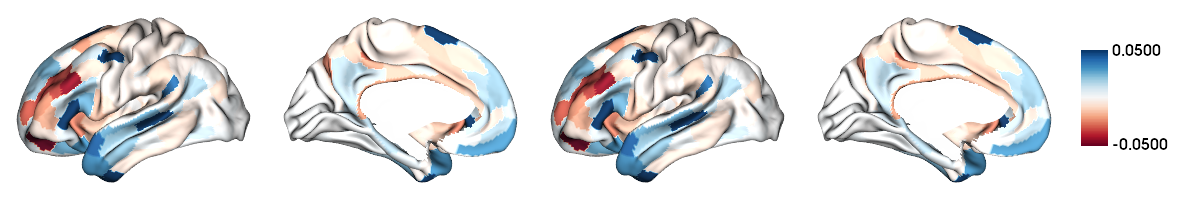

In [5]:
# plot intra asymmetry results using unalignment
proj = [None] * 1
for i in range(1):
  proj[i] = map_to_labels(np.concatenate((unalign_mean_intra[:,i],unalign_mean_intra[:,i])), glasser_ll, mask=mask_ll)
  proj[i][proj[i]==0] = np.nan

plot_hemispheres(surf_lh, surf_lh, array_name = proj, color_range=(-0.05, 0.05),
                 nan_color = (1,1,1,0.01),size = (1200, 200),
                 cmap = 'RdBu', color_bar = True,
                 interactive = False, zoom = 1.5, embed_nb = True,
                 screenshot=True, filename='../figures/response/AI_unalign_intra.png',transparent_bg=True)
plot_hemispheres(surf_lh, surf_lh, array_name = proj,
                 nan_color = (1,1,1,0.01),size = (1200, 200), color_range=(-0.05, 0.05),
                 cmap ='RdBu', color_bar = True,
                 interactive = False, zoom = 1.5, embed_nb = True)

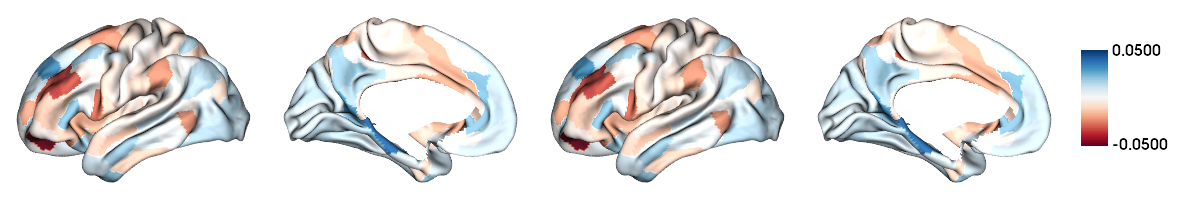

In [6]:
# plot inter asymmetry results using unalignment
proj = [None] * 1
for i in range(1):
  proj[i] = map_to_labels(np.concatenate((unalign_mean_inter[:,i],unalign_mean_inter[:,i])), glasser_ll, mask=mask_ll)
  proj[i][proj[i]==0] = np.nan

plot_hemispheres(surf_lh, surf_lh, array_name = proj, color_range=(-0.05, 0.05),
                 nan_color = (1,1,1,0.01),size = (1200, 200),
                 cmap = 'RdBu', color_bar = True,
                 interactive = False, zoom = 1.5, embed_nb = True,
                 screenshot=True, filename='../figures/response/AI_unalign_inter.png',transparent_bg=True)
plot_hemispheres(surf_lh, surf_lh, array_name = proj,
                 nan_color = (1,1,1,0.01),size = (1200, 200), color_range=(-0.05, 0.05),
                 cmap ='RdBu', color_bar = True,
                 interactive = False, zoom = 1.5, embed_nb = True)

In [7]:
# load data using Procrustes alignment (main results)
procrustes_mean_intra = np.genfromtxt('../data/data_results/gradient/mean_asym_LLRR.csv', delimiter = ',')
procrustes_mean_inter = np.genfromtxt('../data/data_results/gradient/mean_asym_LRRL.csv', delimiter = ',')

In [8]:
# pearson correlation - intra
ss.pearsonr(unalign_mean_intra[:,0], procrustes_mean_intra[:,0])

(0.956031423994271, 9.279904095264048e-97)

In [9]:
# pearson correlation - inter
ss.pearsonr(unalign_mean_inter[:,0], procrustes_mean_inter[:,0])

(0.8434379904810925, 6.563286762382555e-50)

## normalize LLRR

To overcome potential differences in normalization of eigenvectors that may occur when computing LL_RR and LR_RL gradients separately we computed the gradient of LL_RR and LR_RL in the same model, under the assumption that if the homologous regions in the left and right hemisphere would have the same connectivity, they would have the same gradient loading. However, if their connectivity pattern is different, they would have a different loading but differences would be normalized equally for LL_RR and LR_RL as they are part of the same model.

In [10]:
# load LLRR same model data processed by p09_supp*.py
mean_LLRR = 0
mean_LRRL = 0
for i in path_list:
  grad = np.genfromtxt(path+'same_model/LLRR/'+i, delimiter = ',')
  mean_LLRR += grad
  grad = np.genfromtxt(path+'same_model/LRRL/'+i, delimiter = ',')
  mean_LRRL += grad
mean_LLRR = mean_LLRR/len(path_list)
mean_LRRL = mean_LRRL/len(path_list)

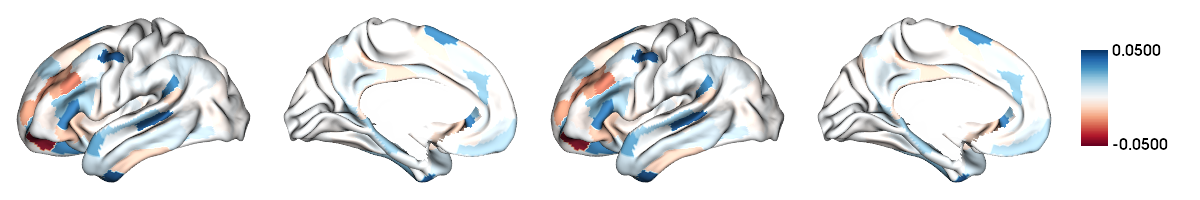

In [11]:
# plot the results of same model - intra
proj = [None] * 1
mean_LLRR_intra = mean_LLRR[:180]-mean_LLRR[180:]
for i in range(1):
  proj[i] = map_to_labels(np.concatenate((mean_LLRR_intra[:,i], mean_LLRR_intra[:,i])),
                          glasser_ll, mask=mask_ll)
  proj[i][proj[i]==0] = np.nan

plot_hemispheres(surf_lh, surf_lh, array_name = proj, color_range=(-0.05, 0.05),
                 nan_color = (1,1,1,0.01),size = (1200, 200),
                 cmap = 'RdBu', color_bar = True,
                 interactive = False, zoom = 1.5, embed_nb = True,
                 screenshot=True, filename='../figures/response/AI_same_model_intra.png',transparent_bg=True)
plot_hemispheres(surf_lh, surf_lh, array_name = proj,
                 nan_color = (1,1,1,0.01),size = (1200, 200), color_range=(-0.05, 0.05),
                 cmap ='RdBu', color_bar = True,
                 interactive = False, zoom = 1.5, embed_nb = True)

In [12]:
# pearson correlation between same model and separate model (main results) - intra
ss.pearsonr(mean_LLRR_intra[:,0], procrustes_mean_intra[:,0])

(0.956191422533453, 6.756534965391212e-97)

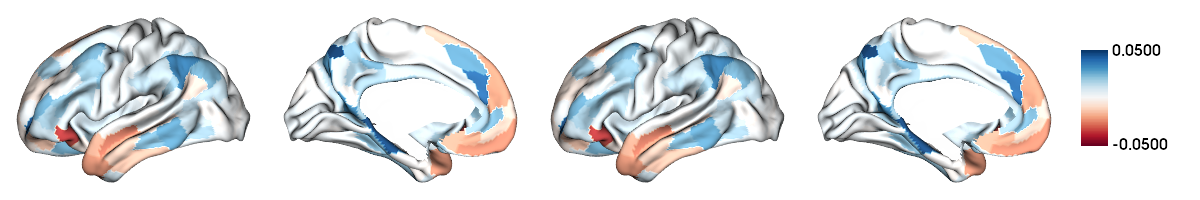

In [13]:
# plot the results of same model - inter
proj = [None] * 1
mean_LRRL_inter = mean_LRRL[:180]-mean_LRRL[180:]
for i in range(1):
  proj[i] = map_to_labels(np.concatenate((mean_LRRL_inter[:,i], mean_LRRL_inter[:,i])),
                          glasser_ll, mask=mask_ll)
  proj[i][proj[i]==0] = np.nan

plot_hemispheres(surf_lh, surf_lh, array_name = proj, color_range=(-0.05, 0.05),
                 nan_color = (1,1,1,0.01),size = (1200, 200),
                 cmap = 'RdBu', color_bar = True,
                 interactive = False, zoom = 1.5, embed_nb = True,
                 screenshot=True, filename='../figures/response/AI_same_model_inter.png',transparent_bg=True)
plot_hemispheres(surf_lh, surf_lh, array_name = proj,
                 nan_color = (1,1,1,0.01),size = (1200, 200), color_range=(-0.05, 0.05),
                 cmap ='RdBu', color_bar = True,
                 interactive = False, zoom = 1.5, embed_nb = True)

In [14]:
# pearson correlation between same model and separate model (main results) - inter
ss.pearsonr(mean_LRRL_inter[:,0], procrustes_mean_inter[:,0])

(0.5305790060781099, 1.8477336323014352e-14)

## UKB unalignment

In [15]:
# load unalignment data (UKB)
ukb_unalign_mean_intra = -np.genfromtxt('../data/data_results/supplementary/ukb/gradient/unalign/mean_asym_LLRR.csv', delimiter = ',')
ukb_unalign_mean_inter = -np.genfromtxt('../data/data_results/supplementary/ukb/gradient/unalign/mean_asym_LRRL.csv', delimiter = ',')

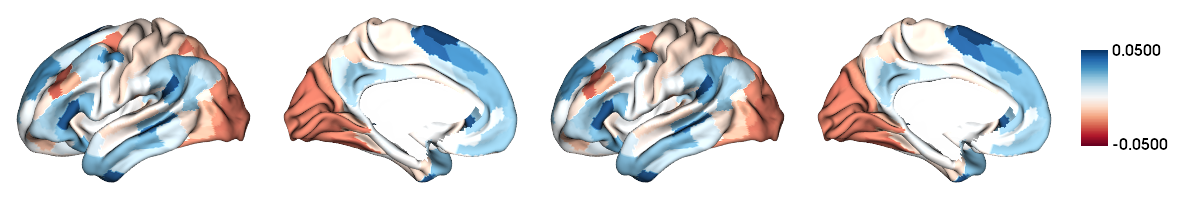

In [16]:
# plot results of unlignment UKB - intra
proj = [None] * 1
for i in range(1):
  proj[i] = map_to_labels(np.concatenate((ukb_unalign_mean_intra[:,i], ukb_unalign_mean_intra[:,i])),
                          glasser_ll, mask=mask_ll)
  proj[i][proj[i]==0] = np.nan

plot_hemispheres(surf_lh, surf_lh, array_name = proj, color_range=(-0.05, 0.05),
                 nan_color = (1,1,1,0.01),size = (1200, 200),
                 cmap = 'RdBu', color_bar = True,
                 interactive = False, zoom = 1.5, embed_nb = True,
                 screenshot=True, filename='../figures/response/ukb_unalign_intra.png',transparent_bg=True)
plot_hemispheres(surf_lh, surf_lh, array_name = proj,
                 nan_color = (1,1,1,0.01),size = (1200, 200), color_range=(-0.05, 0.05),
                 cmap ='RdBu', color_bar = True,
                 interactive = False, zoom = 1.5, embed_nb = True)

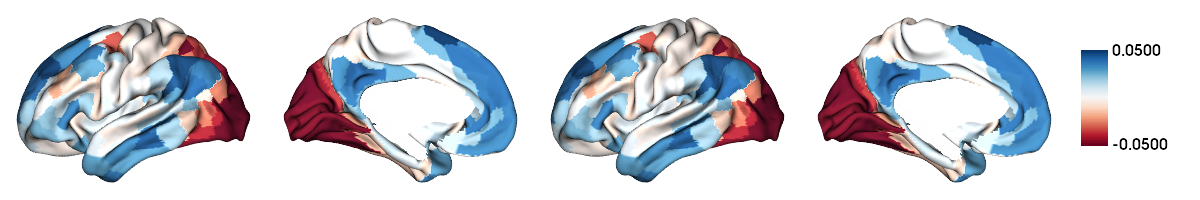

In [17]:
# plot results of unlignment UKB - inter
proj = [None] * 1
for i in range(1):
  proj[i] = map_to_labels(np.concatenate((ukb_unalign_mean_inter[:,i], ukb_unalign_mean_inter[:,i])),
                          glasser_ll, mask=mask_ll)
  proj[i][proj[i]==0] = np.nan

plot_hemispheres(surf_lh, surf_lh, array_name = proj, color_range=(-0.05, 0.05),
                 nan_color = (1,1,1,0.01),size = (1200, 200),
                 cmap = 'RdBu', color_bar = True,
                 interactive = False, zoom = 1.5, embed_nb = True,
                 screenshot=True, filename='../figures/response/ukb_unalign_inter.png',transparent_bg=True)
plot_hemispheres(surf_lh, surf_lh, array_name = proj,
                 nan_color = (1,1,1,0.01),size = (1200, 200), color_range=(-0.05, 0.05),
                 cmap ='RdBu', color_bar = True,
                 interactive = False, zoom = 1.5, embed_nb = True)

#### correlations between UKB unalignment and HCP

In [18]:
# intra
ss.pearsonr(-ukb_unalign_mean_intra[:,0], procrustes_mean_intra[:,0])

(-0.4868969465728433, 4.192192791191586e-12)

In [19]:
# inter
ss.pearsonr(-ukb_unalign_mean_inter[:,0], procrustes_mean_inter[:,0])

(-0.1627495072968091, 0.029044901806599965)

### most asymmetric region: no.12: 55b
### top10% connectivity profiles

regarding ‘change in connectivity somewhere in the matrix’ it is of note that we restricted our analyses to the top 10% of connectivity patterns to perform dimensional reduction techniques on. Thus, any change that may alter potential gradient loadings would fall within the top 10% of a regions’ connectivity profiles. To illustrate this, we selected a left asymmetric region (PSL) with respect to left- and right-ward asymmetry and displayed their difference in top 10% connectivity profiles between left and right hemisphere. 

In [20]:
# load FC data of LL and RR patterns
no_25_l = np.genfromtxt('../data/data_results/FC/LL_groupmean.csv', delimiter=',')[24]
no_25_r = np.genfromtxt('../data/data_results/FC/RR_groupmean.csv', delimiter=',')[24]
no_25_l[ss.rankdata(no_25_l)<163] = 0
no_25_r[ss.rankdata(no_25_r)<163] = 0
no_25_lr = np.concatenate((no_25_l, no_25_r))
no_25_asy = no_25_l - no_25_r

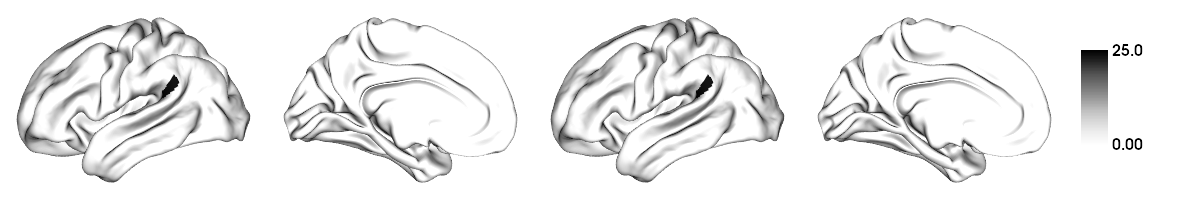

In [27]:
# plot the selected parcel (No.25)
proj = glasser_ll.copy()
proj[proj != 25] = 0
plot_hemispheres(surf_lh, surf_lh, array_name = proj, color_range=(0, 25),
                 nan_color = (1,1,1,0.01),size = (1200, 200),
                 cmap = 'Greys', color_bar = True, 
                 interactive = False, zoom = 1.5, embed_nb = True,
                 screenshot=True, filename='../figures/response/no25.png',transparent_bg=True)
plot_hemispheres(surf_lh, surf_lh, array_name = proj,
                 nan_color = (1,1,1,0.01),size = (1200, 200), color_range=(0, 25),
                 cmap ='Greys', color_bar = True,
                 interactive = False, zoom = 1.5, embed_nb = True)

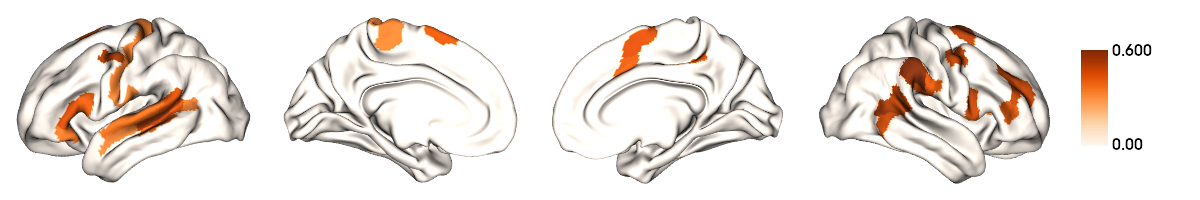

In [22]:
# plot top 10% of FC profile of LL and RR patterns
proj = [None] * 1
for i in range(1):
  proj[i] = map_to_labels(no_25_lr, glasser_lr, mask=mask_lr)
plot_hemispheres(surf_lh, surf_rh, array_name = proj, color_range=(0, 0.6),
                 nan_color = (1,1,1,0.01),size = (1200, 200),
                 cmap = 'Oranges', color_bar = True, 
                 interactive = False, zoom = 1.5, embed_nb = True,
                 screenshot=True, filename='../figures/response/no25_fc_llrr.png',transparent_bg=True)
plot_hemispheres(surf_lh, surf_rh, array_name = proj,
                 nan_color = (1,1,1,0.01),size = (1200, 200), color_range=(0, 0.6),
                 cmap ='Oranges', color_bar = True,
                 interactive = False, zoom = 1.5, embed_nb = True)

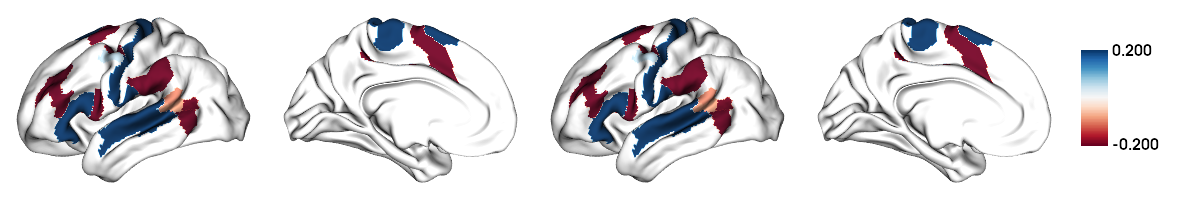

In [23]:
# plot the asymmetry
proj = [None] * 1
for i in range(1):
  proj[i] = map_to_labels(np.concatenate((no_25_asy,no_25_asy)), glasser_ll, mask=mask_ll)
plot_hemispheres(surf_lh, surf_lh, array_name = proj, color_range=(-0.2, 0.2),
                 nan_color = (1,1,1,0.01),size = (1200, 200),
                 cmap = 'RdBu', color_bar = True, 
                 interactive = False, zoom = 1.5, embed_nb = True,
                 screenshot=True, filename='../figures/response/no25_fc_intra.png',transparent_bg=True)
plot_hemispheres(surf_lh, surf_lh, array_name = proj,
                 nan_color = (1,1,1,0.01),size = (1200, 200), color_range=(-0.2, 0.2),
                 cmap ='RdBu', color_bar = True,
                 interactive = False, zoom = 1.5, embed_nb = True)

In [24]:
# load FC data of LR and RL patterns
no_25_l = np.genfromtxt('../data/data_results/FC/LR_groupmean.csv', delimiter=',')[24]
no_25_r = np.genfromtxt('../data/data_results/FC/RL_groupmean.csv', delimiter=',')[24]
no_25_l[ss.rankdata(no_25_l)<163] = 0
no_25_r[ss.rankdata(no_25_r)<163] = 0
no_25_lr = np.concatenate((no_25_l, no_25_r))
no_25_asy = no_25_l - no_25_r

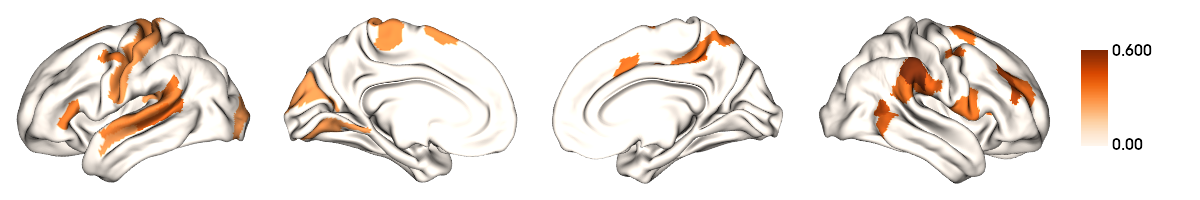

In [25]:
# plot top 10% of FC profile of LR and RL patterns
proj = [None] * 1
for i in range(1):
  proj[i] = map_to_labels(no_25_lr, glasser_lr, mask=mask_lr)
plot_hemispheres(surf_lh, surf_rh, array_name = proj, color_range=(0, 0.6),
                 nan_color = (1,1,1,0.01),size = (1200, 200),
                 cmap = 'Oranges', color_bar = True, 
                 interactive = False, zoom = 1.5, embed_nb = True,
                 screenshot=True, filename='../figures/response/no25_fc_lrrl.png',transparent_bg=True)
plot_hemispheres(surf_lh, surf_rh, array_name = proj,
                 nan_color = (1,1,1,0.01),size = (1200, 200), color_range=(0, 0.6),
                 cmap ='Oranges', color_bar = True,
                 interactive = False, zoom = 1.5, embed_nb = True)

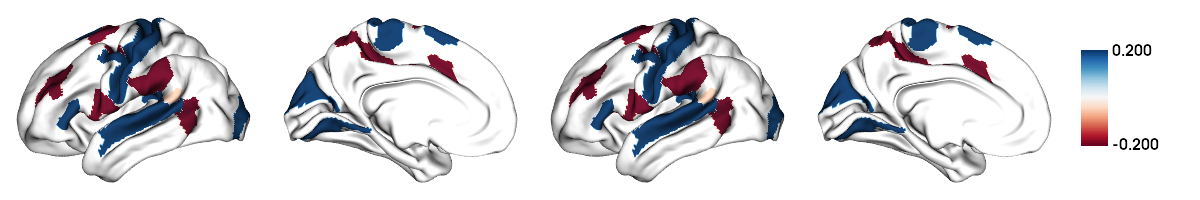

In [26]:
# plot the asymmetry
proj = [None] * 1
for i in range(1):
  proj[i] = map_to_labels(np.concatenate((no_25_asy,no_25_asy)), glasser_ll, mask=mask_ll)
plot_hemispheres(surf_lh, surf_lh, array_name = proj, color_range=(-0.2, 0.2),
                 nan_color = (1,1,1,0.01),size = (1200, 200),
                 cmap = 'RdBu', color_bar = True,
                 interactive = False, zoom = 1.5, embed_nb = True,
                 screenshot=True, filename='../figures/response/no25_fc_inter.png',transparent_bg=True)
plot_hemispheres(surf_lh, surf_lh, array_name = proj,
                 nan_color = (1,1,1,0.01),size = (1200, 200), color_range=(-0.2, 0.2),
                 cmap ='RdBu', color_bar = True,
                 interactive = False, zoom = 1.5, embed_nb = True)